In [21]:
import pickle
import numpy as np

demodir = '/home/anton/Documents/Tulane/Research/ImageNomer/data/UKB2'
demof = f'{demodir}/demographics.pkl'
fcdir = f'{demodir}/conn'

diff = []
ages = []

demo = pickle.load(open(demof, 'rb'))

for sub, age in demo['f_22001_0_0'].items():
    try:
        # r2 = np.load(f'{fcdir}/{sub}_task-20227-2_fc.npy')
        r3 = np.load(f'{fcdir}/{sub}_task-20227-3_fc.npy')
        # w2 = np.load(f'{fcdir}/{sub}_task-20249-2_fc.npy')
        w3 = np.load(f'{fcdir}/{sub}_task-20249-3_fc.npy')
        diff.append(r3-w3)
        ages.append(age == 0)
    except:
        pass

diff = np.stack(diff)
ages = np.stack(ages)

# print(list(demo.keys()))

print([a.shape for a in [diff, ages]])

[(2530, 34716), (2530,)]


In [28]:
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.model_selection import train_test_split

def rmse(yhat, y):
    return np.mean((yhat-y)**2)**0.5

losses = []
nulls = []

for i in range(10):
    xtr, xt, ytr, yt = train_test_split(diff, ages, train_size=2000)

    reg = Ridge(alpha=1000).fit(xtr, ytr)
    yhat = reg.predict(xt)
    loss = rmse(yhat, yt)
    null = rmse(np.mean(yt), yt)
    losses.append(loss)
    nulls.append(null)
    print(loss, null)

    # xtr = np.concatenate([rxtr-wxtr, wxtr-rxtr])
    # xt = np.concatenate([rxt-wxt, wxt-rxt])
    
    # # xtr = np.concatenate([rxtr, wxtr])
    # # xt = np.concatenate([rxt[:500], wxt[:500]])
    # ytr = np.concatenate([np.zeros(len(rxtr)), np.ones(len(wxtr))])
    # # yt = np.concatenate([np.zeros(500), np.ones(500)])
    # yt = np.concatenate([np.zeros(len(rxt)), np.ones(len(wxt))])
    
    # reg1 = Ridge(alpha=1000).fit(rxtr, ytr)
    # reg2 = Ridge(alpha=1000).fit(wxtr, ytr)
    # yhat1 = reg1.predict(rxt)
    # yhat2 = reg2.predict(wxt)
    # loss = rmse((yhat1+yhat2)/2, yt)
    # null = rmse(np.mean(yt), yt)
    # losses.append(loss)
    # nulls.append(null)
    # print(loss, null)

    # reg = LogisticRegression(C=1, max_iter=800).fit(xtr, ytr)
    # yhat = reg.predict(xt)
    # loss = np.mean(yhat == yt)
    # null = np.mean(yt)
    # if null < 0.5:
    #     null = 1-null
    # losses.append(loss)
    # nulls.append(null)
    # print(loss, null)

print(np.mean(losses))
print(np.mean(nulls))

6.353348403200778 7.385668484815992
6.425123896966144 7.346736863521779
6.502991535932474 7.021201681400969
6.55995734071151 7.177215888510555
6.30943173212361 7.090344368792459
6.084744316192846 6.996404508123858
6.503603756269425 7.308036998427205
6.227143117675733 7.081732073178381
6.373008463823248 7.152134117024812
6.317239206104721 7.221210007782913
6.365659176900048
7.1780684991578925


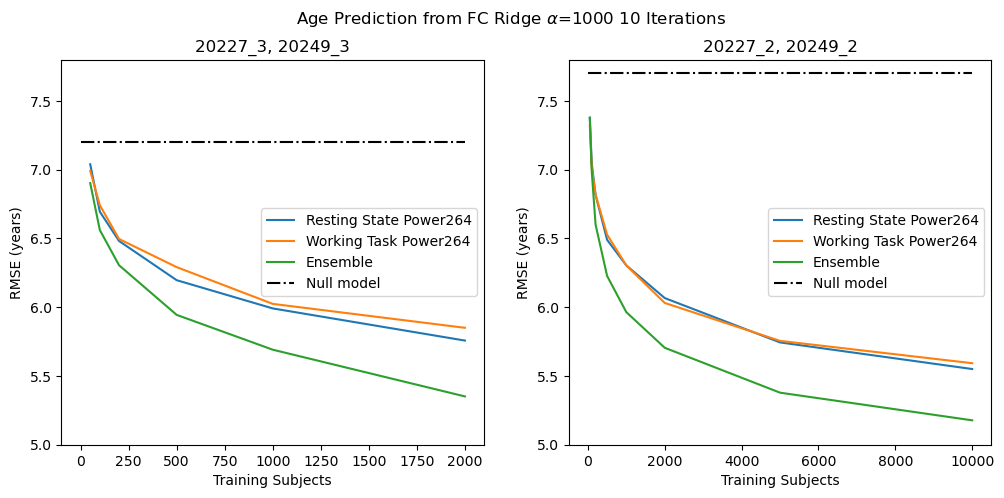

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12,5))

age3nsub = [50, 100, 200, 500, 1000, 2000]
age3rest = [7.039700306, 6.694600501, 6.481761974, 6.196543537, 5.99127754, 5.757528324]
age3work = [6.991128641, 6.74208449, 6.496245469, 6.291472743, 6.024328649, 5.850343717]
age3ens = [6.902853816, 6.561058429, 6.305301517, 5.944216652, 5.691056466, 5.351410693]
age3null = 7.2

age2nsub = [50, 100, 200, 500, 1000, 2000, 5000, 10000]
age2rest = [7.378090786,7.046271109,6.816388339,6.490167573,6.304208614,6.066597564,5.744024087,5.550539579]
age2work = [7.32055095,7.016221878,6.819098452,6.527778065,6.303668108,6.031176167,5.755245443,5.592900103]
age2ens = [7.378508222,6.990348202,6.600530174,6.227334098,5.964268958,5.704988485,5.378506153,5.177456933]
age2null = 7.7

ax[0].plot(age3nsub, age3rest, label='Resting State Power264')
ax[0].plot(age3nsub, age3work, label='Working Task Power264')
ax[0].plot(age3nsub, age3ens, label='Ensemble')
ax[0].plot([0, 2000], [age3null, age3null], color='black', label='Null model', linestyle='-.')

ax[0].legend()
ax[0].set_xlabel('Training Subjects')
ax[0].set_ylabel('RMSE (years)')
ax[0].set_title('20227_3, 20249_3')
ax[0].set_ylim([5, 7.8])

ax[1].plot(age2nsub, age2rest, label='Resting State Power264')
ax[1].plot(age2nsub, age2work, label='Working Task Power264')
ax[1].plot(age2nsub, age2ens, label='Ensemble')
ax[1].plot([0, 10000], [age2null, age2null], color='black', label='Null model', linestyle='-.')

ax[1].legend()
ax[1].set_xlabel('Training Subjects')
ax[1].set_ylabel('RMSE (years)')
ax[1].set_title('20227_2, 20249_2')
ax[1].set_ylim([5, 7.8])

fig.suptitle('Age Prediction from FC Ridge $\\alpha$=1000 10 Iterations')
fig.show()
fig.savefig('/home/anton/Documents/Tulane/Research/Work/UKB/rest-work-age.pdf')

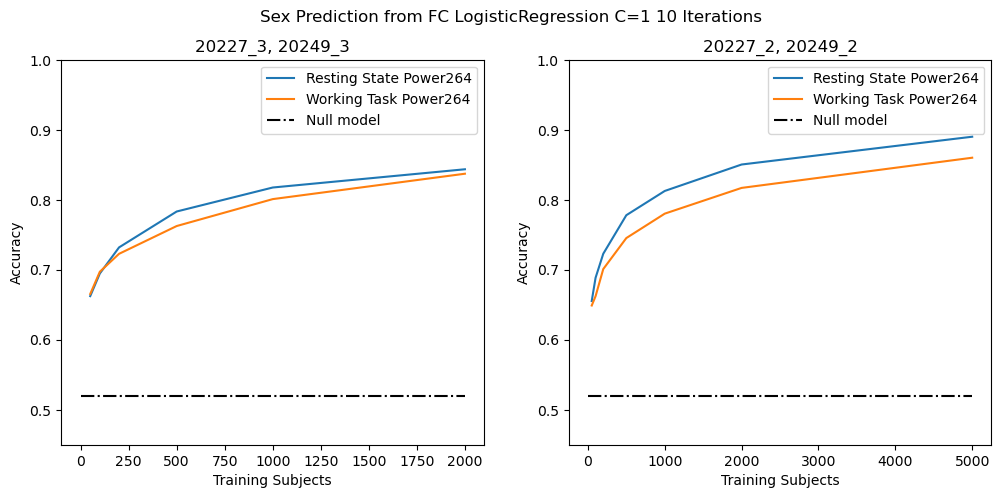

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12,5))

age2nsub = [50, 100, 200, 500, 1000, 2000]
age2rest = [0.6622909091,0.6945925926,0.7318846154,0.783173913,0.8174444444,0.8435]
age2work = [0.6653278689,0.6971129707,0.7227074236,0.7624120603,0.8008724832,0.8371428571]
age2null = 0.52

age2nsub = [50, 100, 200, 500, 1000, 2000, 5000]
age2rest = [0.6553002374,0.6885517799,0.7228176011,0.7778810789,0.8125090552,0.8503054287,0.89]
age2work = [0.6488759587,0.6622001825,0.700953393,0.7452336282,0.7801082258,0.816880202,0.86]
age2null = 0.52

ax[0].plot(age3nsub, age3rest, label='Resting State Power264')
ax[0].plot(age3nsub, age3work, label='Working Task Power264')
ax[0].plot([0, 2000], [age3null, age3null], color='black', label='Null model', linestyle='-.')

ax[0].legend()
ax[0].set_xlabel('Training Subjects')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('20227_3, 20249_3')
ax[0].set_ylim([0.45, 1])

ax[1].plot(age2nsub, age2rest, label='Resting State Power264')
ax[1].plot(age2nsub, age2work, label='Working Task Power264')
ax[1].plot([0, 5000], [age2null, age2null], color='black', label='Null model', linestyle='-.')

ax[1].legend()
ax[1].set_xlabel('Training Subjects')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('20227_2, 20249_2')
ax[1].set_ylim([0.45, 1])

fig.suptitle('Sex Prediction from FC LogisticRegression C=1 10 Iterations')
fig.show()
fig.savefig('/home/anton/Documents/Tulane/Research/Work/UKB/rest-work-sex.pdf')

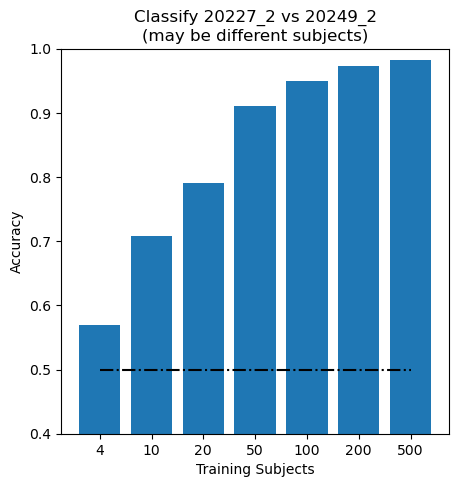

In [44]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(5,5))

nsubs = [4, 10, 20, 50, 100, 200, 500]
acc = [0.5693,0.7087,0.7904,0.9109,0.95,0.9737,0.9817]
null = 0.5

ax.plot([0, 6], [null, null], label='Null model', color='black', linestyle='-.')
ax.bar(x=np.arange(len(acc)), height=acc)
ax.set_xticks(np.arange(len(acc)), nsubs)
ax.set_ylim([0.4,1])
ax.set_ylabel('Accuracy')
ax.set_xlabel('Training Subjects')
ax.set_title('Classify 20227_2 vs 20249_2\n(may be different subjects)')

fig.show()
fig.savefig('/home/anton/Documents/Tulane/Research/Work/UKB/rest-vs-work.pdf')

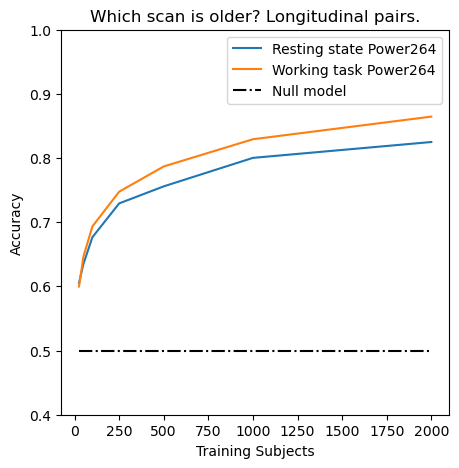

In [73]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(5,5))

nsub = [25, 50, 100, 250, 500, 1000, 2000]
rest = [0.6053033517,0.6352915952,0.6766432954,0.729315197,0.7558979809,0.8002894356,0.825]
work = [0.5997892962,0.6468483816,0.6934290688,0.7475791434,0.7869336143,0.8293276109,0.8645728643]

ax.plot(nsub, rest, label='Resting state Power264')
ax.plot(nsub, work, label='Working task Power264')
ax.plot([25, 2000], [0.5, 0.5], color='black', linestyle='-.', label='Null model')
ax.set_title('Which scan is older? Longitudinal pairs.')
ax.set_xlabel('Training Subjects')
ax.set_ylabel('Accuracy')
ax.set_ylim([0.4,1])
ax.legend()

fig.show()
fig.savefig('/home/anton/Documents/Tulane/Research/Work/UKB/first-vs-second.pdf')

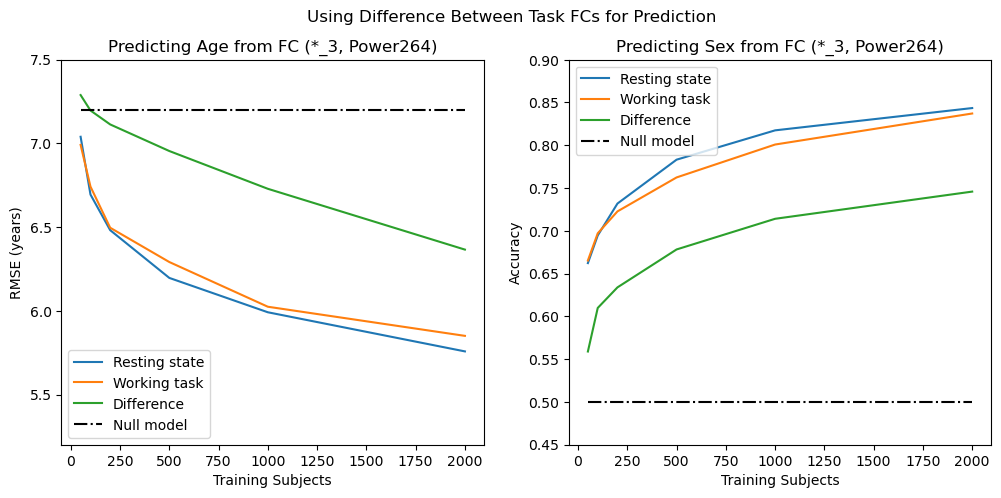

In [37]:
# Prediction from difference of scanner tasks

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12,5))

nsub = [50, 100, 200, 500, 1000, 2000]
sex_rest = [0.6622909091,0.6945925926,0.7318846154,0.783173913,0.8174444444,0.8435]
sex_work = [0.6653278689,0.6971129707,0.7227074236,0.7624120603,0.8008724832,0.8371428571]
sex_diff = [0.5589425857,0.6098692535,0.6339057684,0.6782343988,0.7140720598,0.7458598726]
age_rest = [7.039700306,6.694600501,6.481761974,6.196543537,5.99127754,5.757528324]
age_work = [6.991128641,6.74208449,6.496245469,6.291472743,6.024328649,5.850343717]
age_diff = [7.288900859,7.196767262,7.113415511,6.954574409,6.728897894,6.365659177]
age_null = 7.2
sex_null = 0.5

ax[0].plot(nsub, age_rest, label='Resting state')
ax[0].plot(nsub, age_work, label='Working task')
ax[0].plot(nsub, age_diff, label='Difference')
ax[0].plot([50, 2000], [age_null, age_null], label='Null model', color='black', linestyle='-.')
ax[0].set_ylim([5.2, 7.5])
ax[0].legend()
ax[0].set_xlabel('Training Subjects')
ax[0].set_ylabel('RMSE (years)')
ax[0].set_title('Predicting Age from FC (*_3, Power264)')

ax[1].plot(nsub, sex_rest, label='Resting state')
ax[1].plot(nsub, sex_work, label='Working task')
ax[1].plot(nsub, sex_diff, label='Difference')
ax[1].plot([50, 2000], [sex_null, sex_null], label='Null model', color='black', linestyle='-.')
ax[1].set_ylim([0.45, 0.9])
ax[1].legend()
ax[1].set_xlabel('Training Subjects')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Predicting Sex from FC (*_3, Power264)')

fig.suptitle('Using Difference Between Task FCs for Prediction')
fig.show()
fig.savefig('/home/anton/Documents/Tulane/Research/Work/UKB/pred-with-diff.pdf')